In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt

import seaborn as sns
color_palette = sns.color_palette()
plt.style.use('seaborn-v0_8-talk')

from IPython.display import clear_output, display

In [3]:
data = pd.read_csv("AEP_hourly.csv")
data.set_index("Datetime", inplace=True)
data.index = pd.to_datetime(data.index)

#data.plot(y='AEP_MW', figsize=(15, 5), style='-', color=color_palette[0], linewidth=1)

train = data[data.index <= '2018-06-30 23:59:59'] # < 2017
test = data[data.index > '2018-06-30 23:59:59'] # 2018 + (Mayo)

<AxesSubplot: xlabel='Datetime'>

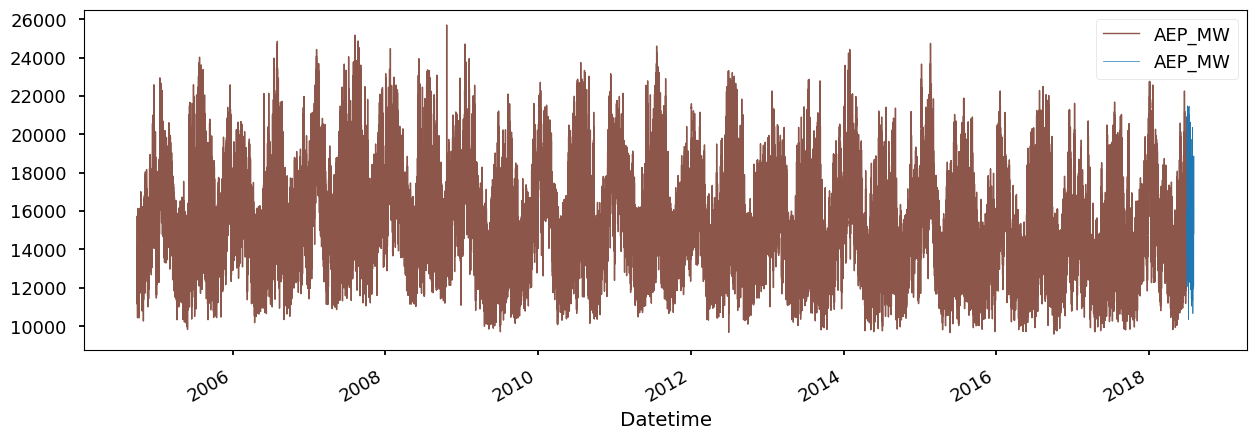

In [4]:
ax = train.plot(y='AEP_MW', figsize=(15, 5), style='-', color=color_palette[5], linewidth=1)
test.plot(y='AEP_MW', figsize=(15, 5), style='-', color=color_palette[0], linewidth=0.5, ax=ax)

<AxesSubplot: xlabel='Datetime'>

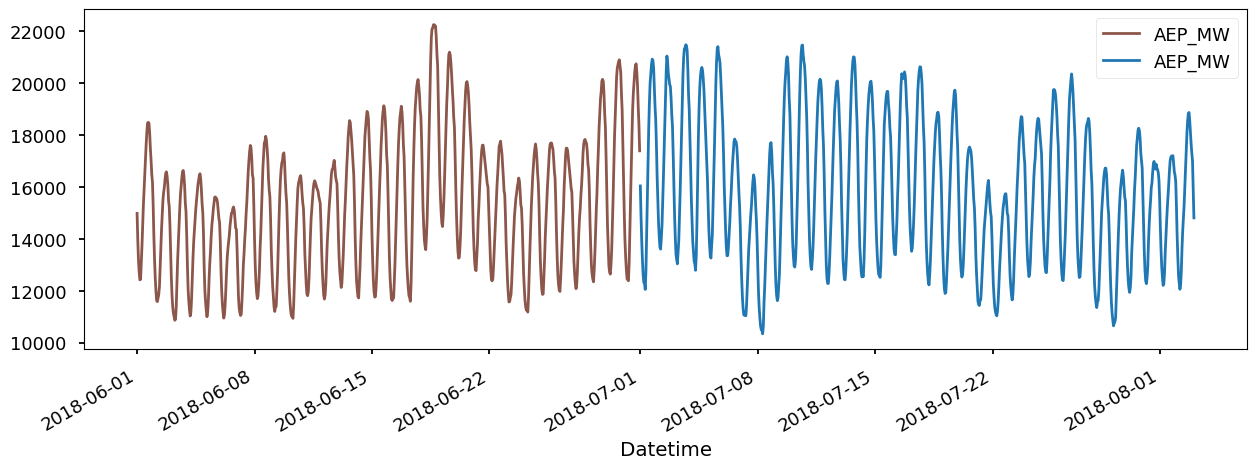

In [5]:
train = train[train.index >= '2018-05-31 23:59:59'] 
ax = train.plot(y='AEP_MW', figsize=(15, 5), style='-', color=color_palette[5], linewidth=2)
test.plot(y='AEP_MW', figsize=(15, 5), style='-', color=color_palette[0], linewidth=2, ax=ax)

<AxesSubplot: xlabel='Datetime'>

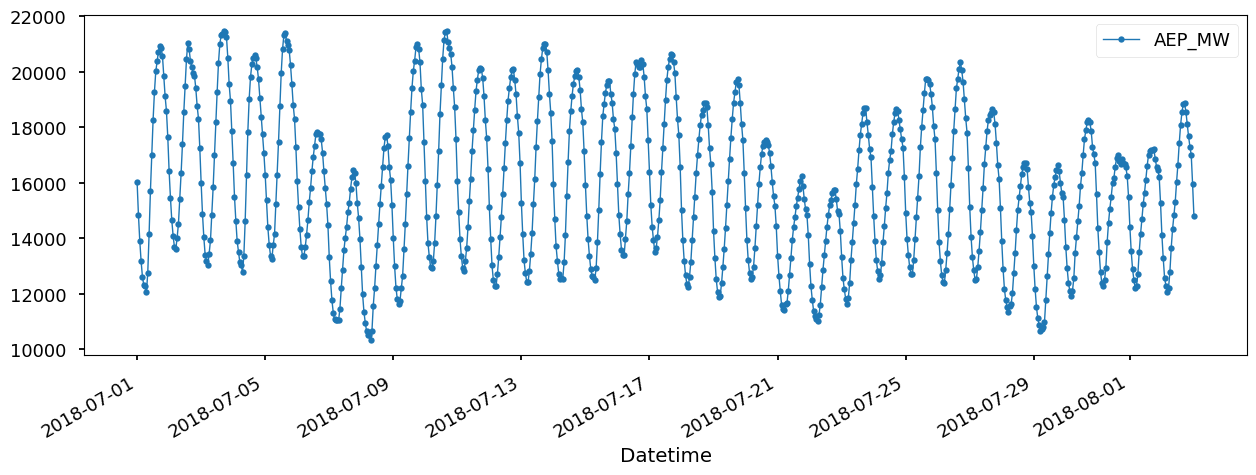

In [6]:
test.plot(y='AEP_MW', figsize=(15, 5), style='.-', color=color_palette[0], linewidth=1)

## ARIMA

In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
%%time 

history = [x for x in train["AEP_MW"]]
predictions = list()

count = 1
for t in range(len(test)):
    
    clear_output(wait=True)
    
    # fit models
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test["AEP_MW"][t]
    history.append(obs)
    print('progress=%i/100, predicted=%f, expected=%f' % (int((((count/len(test)) * 100))), yhat, obs))
    count += 1

progress=100/100, predicted=15246.483965, expected=16039.000000
CPU times: total: 36.1 s
Wall time: 40.4 s


<AxesSubplot: xlabel='Datetime'>

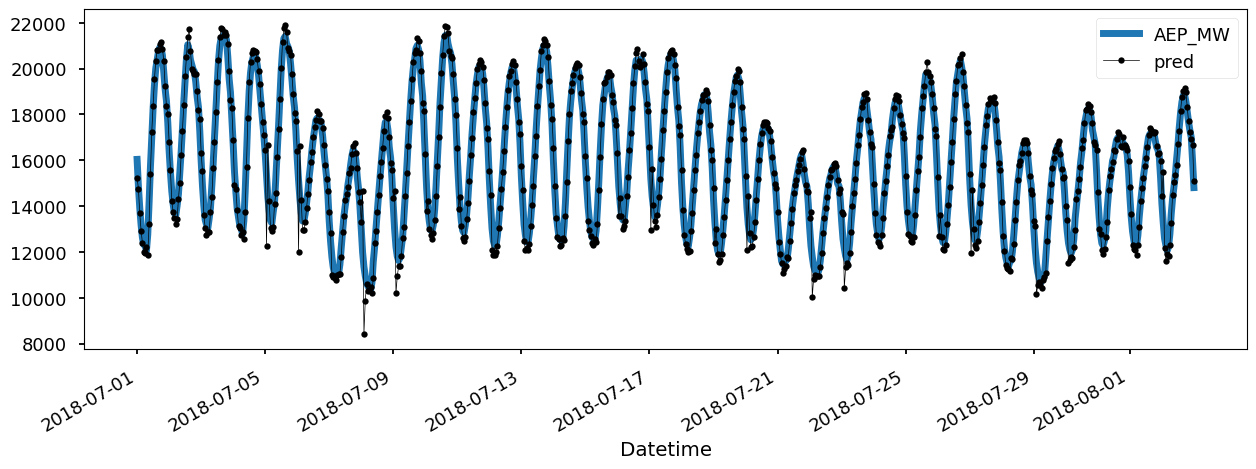

In [9]:
test_df = pd.DataFrame()
test_df.index = test.index
test_df["AEP_MW"] = test["AEP_MW"]
test_df["pred"] = predictions

ax = test_df.plot(y='AEP_MW', figsize=(15, 5), style='-', color=color_palette[0], linewidth=5)
test_df.plot(y='pred', figsize=(15, 5), style='.-', color="black", linewidth=0.5, ax=ax)

<AxesSubplot: xlabel='Datetime'>

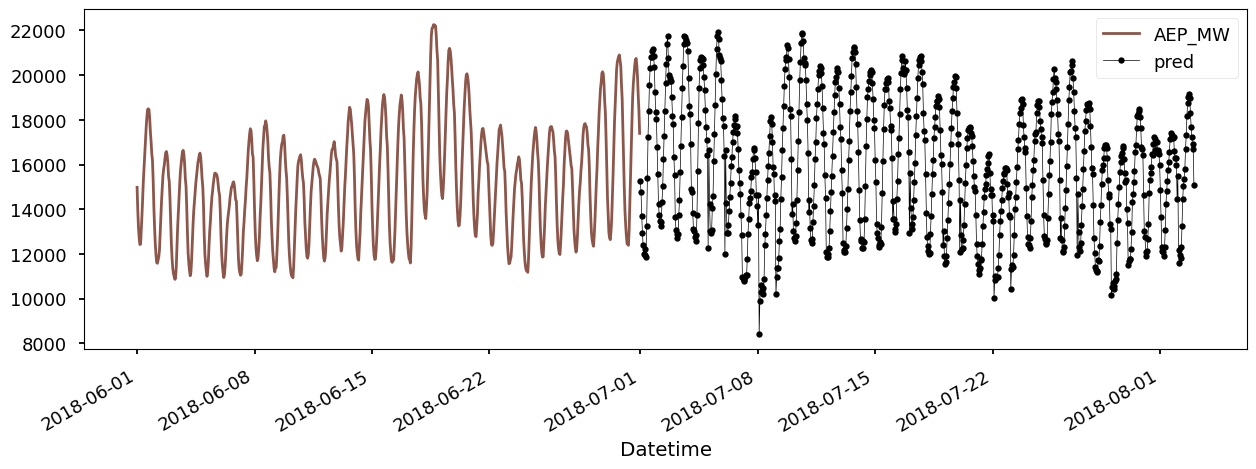

In [10]:
train = train[train.index >= '2018-05-31 23:59:59'] 
ax = train.plot(y='AEP_MW', figsize=(15, 5), style='-', color=color_palette[5], linewidth=2)
test_df.plot(y='pred', figsize=(15, 5), style='.-', color="black", linewidth=0.5, ax=ax)

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_df["AEP_MW"], predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 460.387
